In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Home       128 non-null    int64 
 1   Price      128 non-null    int64 
 2   Size       128 non-null    int64 
 3   Bedrooms   128 non-null    int64 
 4   Bathrooms  128 non-null    int64 
 5   Offers     128 non-null    int64 
 6   Brick      128 non-null    object
 7   Location   128 non-null    object
dtypes: int64(6), object(2)
memory usage: 8.1+ KB
None
             Home          Price         Size    Bedrooms   Bathrooms  \
count  128.000000     128.000000   128.000000  128.000000  128.000000   
mean    64.500000  130427.343750  2000.937500    3.023438    2.445312   
std     37.094474   26868.770371   211.572431    0.725951    0.514492   
min      1.000000   69100.000000  1450.000000    2.000000    2.000000   
25%     32.750000  111325.000000  1880.000000    3.000000    2.000000   
50%     64.50

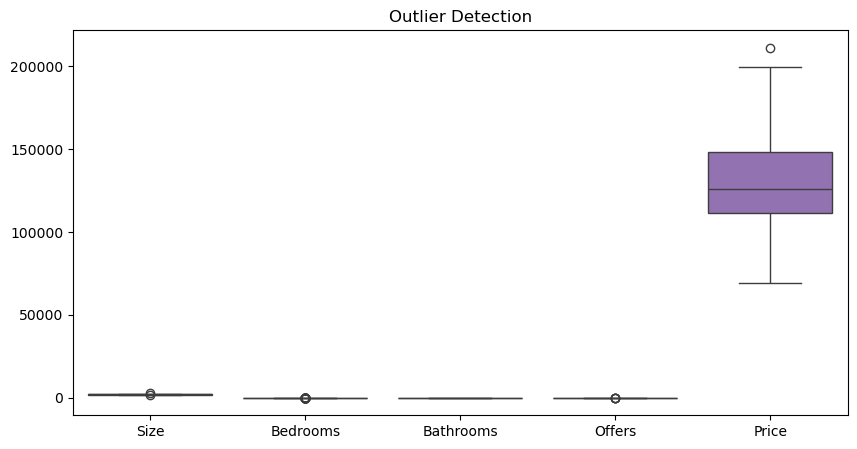

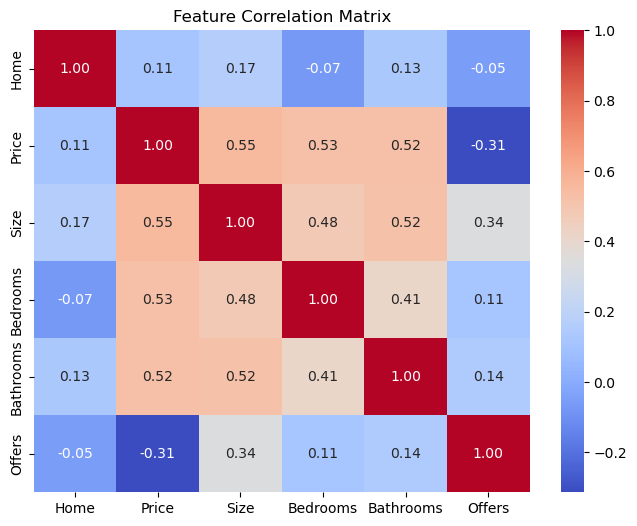

RMSE: 10685.055847048183
R² Score: 0.8062934622232132


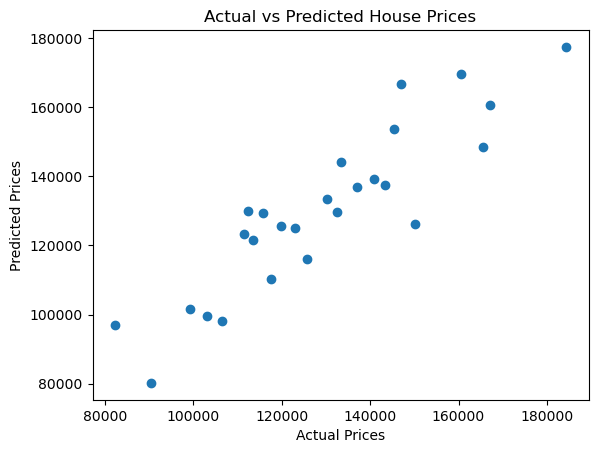

In [ ]:
# Load the dataset
data = pd.read_csv('house_prices.csv')

# Strip whitespace from column names
data.columns = data.columns.str.strip()

# Inspecting dataset
print(data.info())
print(data.describe())
print(data.isnull().sum())  # Check for missing values

# Outlier detection using boxplots
plt.figure(figsize=(10,5))
sns.boxplot(data=data[["Size", "Bedrooms", "Bathrooms", "Offers", "Price"]])
plt.title("Outlier Detection")
plt.show()

# Feature selection using correlation analysis (excluding categorical variables)
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

# Define features and target variable
X = data[["Size", "Bedrooms", "Bathrooms", "Offers", "Brick", "Location"]]
y = data["Price"]

# Preprocessing: Encoding categorical variables and scaling numeric data
preprocessor = ColumnTransformer([
    ("num", MinMaxScaler(), ["Size", "Bedrooms", "Bathrooms", "Offers"]),  # Using Min-Max Scaling
    ("cat", OneHotEncoder(drop='first'), ["Brick", "Location"])
])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with preprocessing and model
model = Pipeline([
    ("preprocessor", preprocessor),
    ("regressor", LinearRegression())
])

# Train the model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")

# Visualizing results
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()